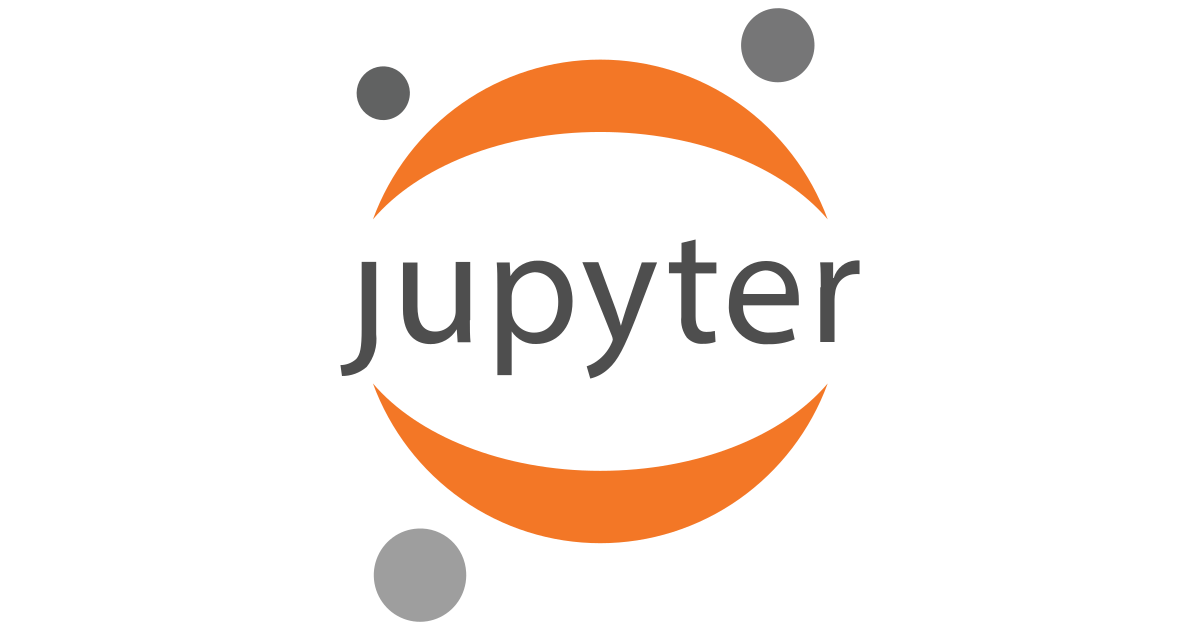

Building Presentable Notebooks in Jupyter
=====================================================

**A collection of tips, examples, and tools to make content in Jupyter easy to share with broad audiences**

## Table of Contents

1. [Building a ToC with Header Links](#chapter1)
2. [Headings, Subheadings, and Text](#chapter2)
3. [Using HTML to Modify Text](#chapter3)
4. [Images, Videos, and Other Content](#chapter4)
5. [Colorizing Tabular Data](#chapter5)
6. [Interactive Tables](#chapter6)
7. [Download as CSV Widget/Button](#chapter7)
8. [Data Visualizations](#chapter8)
9. [Export as HTML or PDF](#chapter9)
10. [Pandas-Profiling](#chapter10)

<h2 id="chapter1">1. Building a ToC with Header Links</h2>

A table of contents can be built in markdown using an ordered or unordered list. An ordered list is a list of items starting with a `number` and a period.

```
1. First
2. Second
3. Third
```

An unordered list can begin with an asterisk, hyphen, or plus sign but ends up as a bullet regardless of whichever is used.

```
* Item
- Item
+ Item
```

The table of contents displays the overall structure of a notebook and where something is located but it can be enhanced by using anchors. Add an anchor to a section heading to set it as a destination.

```<h2 id="chapter1">Heading</h2>```

Then that anchor can be referenced within the ToC so that clicking on it will link to the referenced section in the notebook.

```[Heading](#chapter1)```

Incorporating this technique makes a notebook, especially a large one, much easier to navigate.

<h2 id="chapter2">2. Headings, Subheadings, and Text</h2>

Headings and subheadings can be created via hashes `#` in Markdown. A general way to go about using different levels of headings could be the following:

```
# Titles
## Major heading
### Subheading
#### Lower level subheading
##### Even lower level subheading
###### Lowest level subheading
```
You can see these same elements in HTML below:

```
<h1>Text</h1>
<h2>Text</h2>
<h3>Text</h3>
<h4>Text</h4>
<h5>Text</h5>
<h6>Text</h6>
```
Text inside sections can be modified in a few ways. Text can be **bold** (`**bold**`), *italicized* (`*italicized*`), or have ~~strikethrough~~ (`~~strikethrough~~`) applied. This is enough for simple notebooks but,
for those instances where further modification of text is needed, inline HTML can be used.

<h2 id="chapter3">3. Using HTML to Modify Text</h2>

While inline HTML is possible in Markdown, usage is slightly discouraged in the syntax notes because Markdown is meant to be widely approachable and easy to read/write/share.

>Markdown’s syntax is intended for one purpose: to be used as a format for writing for the web. 
>
>Markdown is not a replacement for HTML, or even close to it. Its syntax is very small, corresponding only to a very small subset of HTML tags. The idea is not to create a syntax that makes it easier to insert HTML tags. In my opinion, HTML tags are already easy to insert. The idea for Markdown is to make it easy to read, write, and edit prose. HTML is a publishing format; Markdown is a writing format. Thus, Markdown’s formatting syntax only addresses issues that can be conveyed in plain text.

*^You can use the greater than symbol `>` in front of text to create a blockquote like above.*

Nonetheless, HTML can used to <span style="color:red">colorize</span> or <mark>highlight</mark> text to add an extra emphasis that Markdown does not inherently provide.

Use `<span style="color:red">colorize</span>` to colorize text and `<mark>highlight</mark>` to highlight text.

It is important to understand that using these methods reduces the compatibility of a notebook on different hosting sites. For instance, GitHub does not (currently) display text highlights. The best way to ensure compatibility is to export as an HTML or PDF file (see [Section 9](#chapter9)) and view appropriately.

Alternatively, you can upload a notebook on GitHub but view it through [nbviewer](https://nbviewer.org/) or [Binder](https://mybinder.org/).

<h2 id="chapter4">4. Images, Videos, and Other Content</h2>

When using Jupyter Lab, inserting images can be done by dragging a file into a cell and creating an attachment. This will automatically generate the Markdown syntax to display the image like below.

```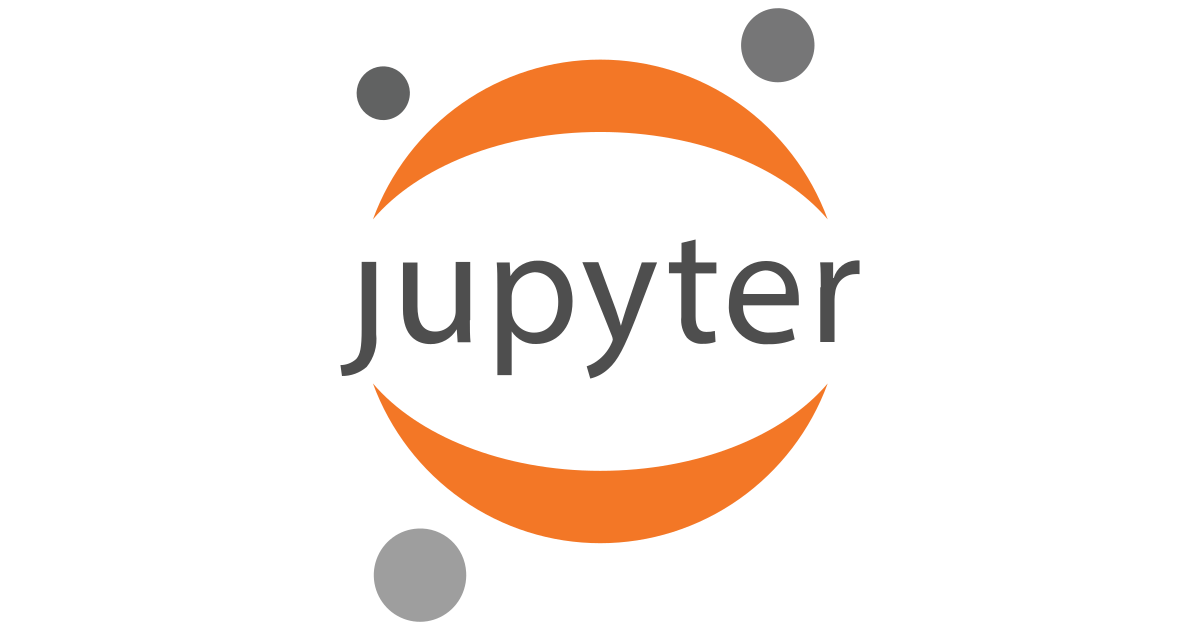```

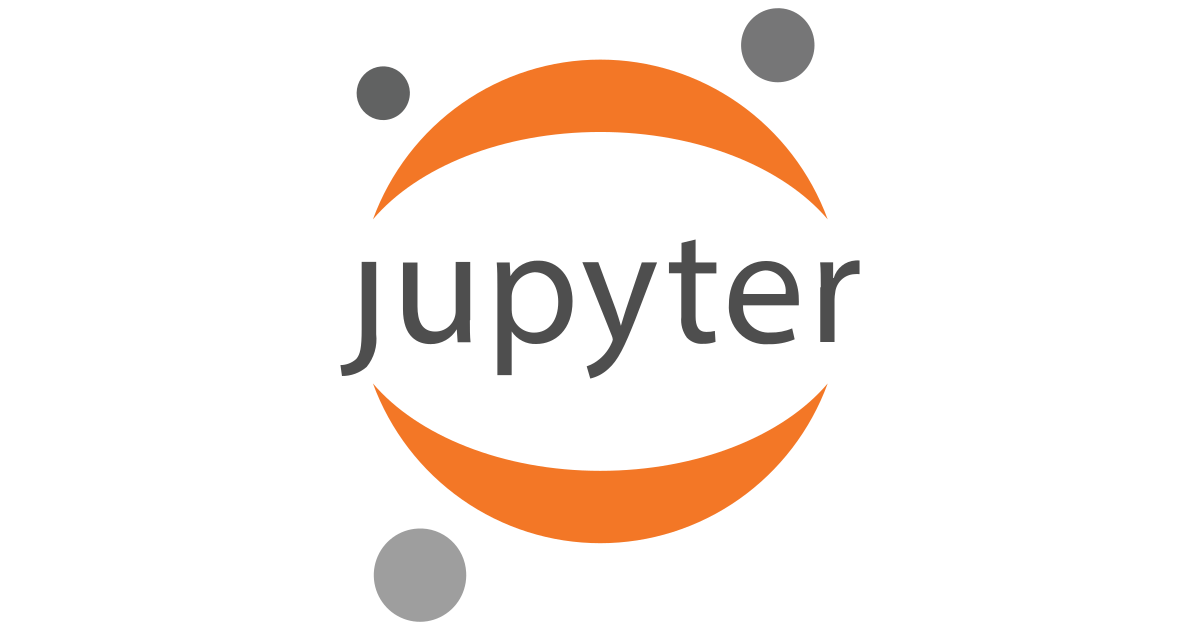

Another method would be to use the URL of an image hosted online. [Imgur](https://imgur.com/) is a free service that can be used to host images.

```![Jupyter Logo](https://i.imgur.com/HaiZQxF.png)```

### Using iframe

If images/gifs are not enough, there is always the option to embed elements via `iframe`. 

Many sites will provide embed code that can just be copied and pasted like this YouTube example.

```<iframe width="560" height="315" src="https://www.youtube.com/embed/yEIc9z-Ad3k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>```

Parameters like `height` and `width` can be changed to further customize the embedded element.

<iframe width="800" height="500" src="https://www.youtube.com/embed/yEIc9z-Ad3k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Just as with videos, `iframe` can be used to embed other web content in notebooks. There are plenty of options to explore but one noteworthy example is embedding a live Google Sheet. By selecting "Publish to the web" in Google Sheets, the code to embed is made available.

```<iframe src="https://docs.google.com/spreadsheets/d/e/2PACX-1vQvEpJdnx17lFsoJEJuUKuAoNjB2GfnJSnsPC8CM_OqXNeK08uwLmrRVt0j0A6uswk0VFKJck6N9rqC/pubhtml?widget=true&amp;headers=false"></iframe>```

<iframe width="800" height="500" src="https://docs.google.com/spreadsheets/d/e/2PACX-1vQvEpJdnx17lFsoJEJuUKuAoNjB2GfnJSnsPC8CM_OqXNeK08uwLmrRVt0j0A6uswk0VFKJck6N9rqC/pubhtml?widget=true&amp;headers=false"></iframe>

<h2 id="chapter5">5. Colorizing Tabular Data</h2>

If you are using Jupyter with Python, it is virtually guaranteed that you are using Pandas to perform data manipulation. But what if you want to liven up the data being displayed in output cells to be more engaging and presentable?

Pandas has a `Styler` class to colorize tabular data displayed within notebooks to do just that. 

> The Styler creates an HTML `<table>` and leverages CSS styling language to manipulate many parameters including colors, fonts, borders, background, etc. This allows a lot of flexibility out of the box, and even enables web developers to integrate DataFrames into their exiting user interface designs.

A couple of examples can be found below but the [full documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) shows many more.

### Simple Style Function 

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Suppressing any Pandas warnings that may appear

In [4]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

def color_positive_green(number):
    if number > 0:
        color = 'green'
    else:
        color = 'red'
    return f'color: {color}'

df.style.applymap(color_positive_green)

### Seaborn Colormap Background Gradient

In [5]:
import seaborn as sns

cm = sns.color_palette('vlag_r', as_cmap=True)

df.style.background_gradient(cmap=cm)

### Bars in DataFrame

In [6]:
df.style.bar(subset=('D'), color='#186BA3')

<h2 id="chapter6">6. Interactive Tables</h2>

The `itables` package in Python takes DataFrames to another level by adding features like pagination, sorting, filtering, and searching.

Refer to the [full documentation](https://mwouts.github.io/itables/quick_start.html) for more information and advanced parameters but a few common examples are demonstrated below.

### Default Table

In [7]:
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True, connected=True)

np.random.seed(0)

df2 = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))

show(df2)

### Pagination Replaced with Vertical Scroll

In [8]:
show(df2, scrollY='400px', scrollCollapse=True, paging=False)

### Include a Table Caption

In [9]:
show(df2, tags='<caption>This DataFrame has 1000 Rows and 4 Columns</caption>')

### Search by Column

In [10]:
show(df2, column_filters='header', dom='lrtip')

### Colorizing Cell Content via JavaScript

In [11]:
from itables import JavascriptFunction

show(df2,
     columnDefs=[
         {'targets': '_all',
          'createdCell': JavascriptFunction(
            '''
function (td, cellData, rowData, row, col) {
    if (cellData > 0) {
        $(td).css('color', 'green')
    } else {
        $(td).css('color', 'red')    
    } 
}
            '''
            ),
        },
    ],
)

<h2 id="chapter7">7. Download as CSV Widget/Button</h2>

Sometimes it is not just enough to present data, but make it available to others to download. In the future, `itables` may be updated to include "Copy", "CSV", "PDF" and "Excel" buttons according to its author. For now, an alternative approach can be applied using `base64` and HTML widgets. The major caveat being that this method will only work on small to medium sized DataFrames.

In the examples below, each DataFrame is displayed with an accompanying "Download as CSV" option.

In [12]:
import base64
from IPython.display import HTML

def download_button(df, filename='Download.csv'):
    file = df.to_csv(sep=',', index=False)
    b64 = base64.b64encode(file.encode())
    payload = b64.decode()
    html = '''
        <html> 
        <head>
        <meta name="viewport" content="width=device-width, initial-scale=1">
        </head>
        <body>
        <a download="{filename}" href="data:text/csv;base64, {payload}" target="_blank">
        <button class="p-Widget jupyter-widgets jupyter-button widget-button">Download as CSV</button>
        </a>
        </body>
        </html>
           '''
    button = html.format(payload=payload, filename=filename)
    return HTML(button)

display(df)
download_button(df)

A         B         C         D
0  0.939500  0.642292  0.051379  0.470029
1 -0.430852  0.939375  1.995842 -0.845715
2 -0.723420  0.227786 -0.255236 -0.864964
3  1.007459  2.270587  0.041228  1.914545
4 -0.415753 -0.647025 -1.044553 -0.202082
5 -0.368342  0.141237  0.490409 -0.995925
6  0.167078 -0.391784 -0.002384 -1.189162
7  0.536088 -0.105813  0.494661 -0.608399
8 -1.473324  1.380697 -0.874959 -0.041464
9 -1.479200 -1.144284 -0.600730 -0.982981

In [13]:
display(df2)
download_button(df2)

A         B         C         D
0    1.764052  0.400157  0.978738  2.240893
1    1.867558 -0.977278  0.950088 -0.151357
2   -0.103219  0.410599  0.144044  1.454274
3    0.761038  0.121675  0.443863  0.333674
4    1.494079 -0.205158  0.313068 -0.854096
..        ...       ...       ...       ...
995  0.889514  1.540933 -1.465914 -0.069589
996  1.946050  0.976382  0.177158 -1.023173
997  0.106720 -0.911881 -1.468367  0.576479
998  0.065306 -0.773513  0.394948 -0.503890
999  1.779559 -0.030572  1.577088 -0.812802

[1000 rows x 4 columns]

<h2 id="chapter8">8. Data Visualizations</h2>

A notebook's ability to contain data visualizations is one of the major reasons why it is so prominently used for data science projects by enthusiasts and professionals alike.

There are many data visualization options available when using Python but the examples here are made with `Plotly` since it can be used to make both interactive and static data visualizations. Learn more about Plotly by visiting [their website](https://plotly.com/python/).

### Interactive Plotly Visualizations

In [14]:
import plotly.express as px

df3 = dict(value=[45, 31, 19, 11, 3],
           step=list('ABCDE'))

fig1 = px.funnel(df3,
                 x='value',
                 y='step',
                 height=600)
fig1.show()

In [15]:
from ridgeplot import ridgeplot

demo_sample = [np.random.normal(n / 1.4, size=200) for n in range(7, 0, -1)]

fig2 = ridgeplot(samples=demo_sample,
                 bandwidth=0.15,
                 colorscale='blackbody_r',
                 coloralpha=0.9)

fig2.update_layout(height=600)

fig2.show()

In [16]:
df4 = px.data.election()
geojson = px.data.election_geojson()

fig3 = px.choropleth_mapbox(df4, 
                            geojson=geojson,
                            color='Joly',
                            color_continuous_scale='portland',
                            locations='district',
                            featureidkey='properties.district',
                            center={'lat': 45.54, 'lon': -73.71},
                            mapbox_style='open-street-map',
                            opacity=0.7,
                            zoom=9.5,
                            height=600,
                            labels={'Joly': 'Votes'})

fig3.update_layout(margin={'r': 0,'t': 0,'l': 0,'b': 0})

fig3.show()

### Static Plotly Visualizations

All of the visualizations above can be rendered statically by using `show(renderer='png')` so that the default renderer is not used.

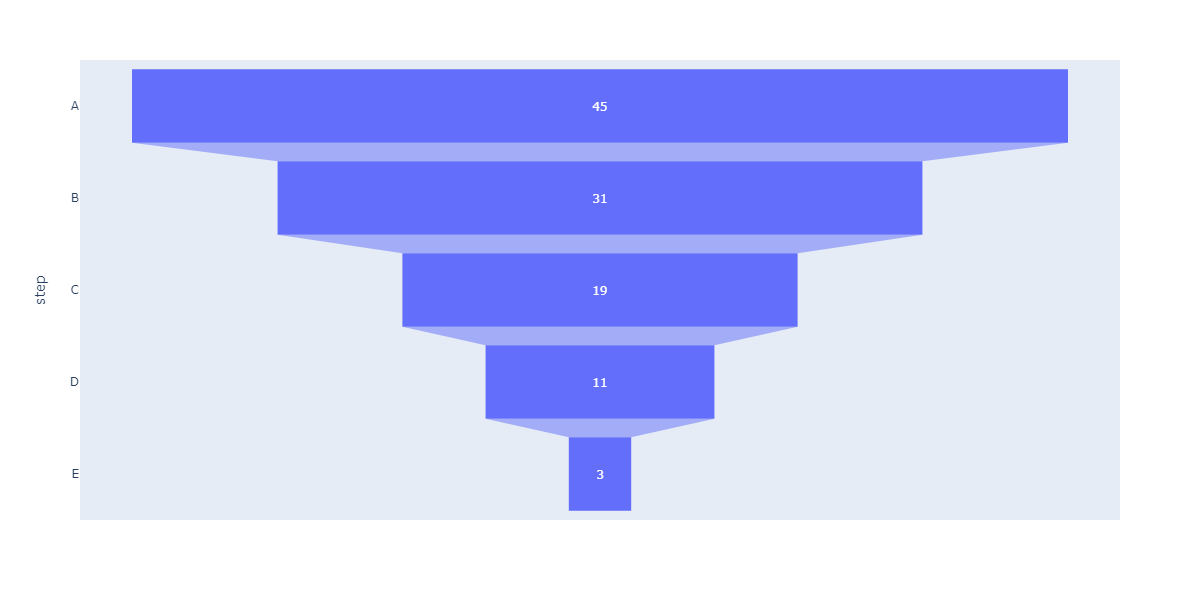

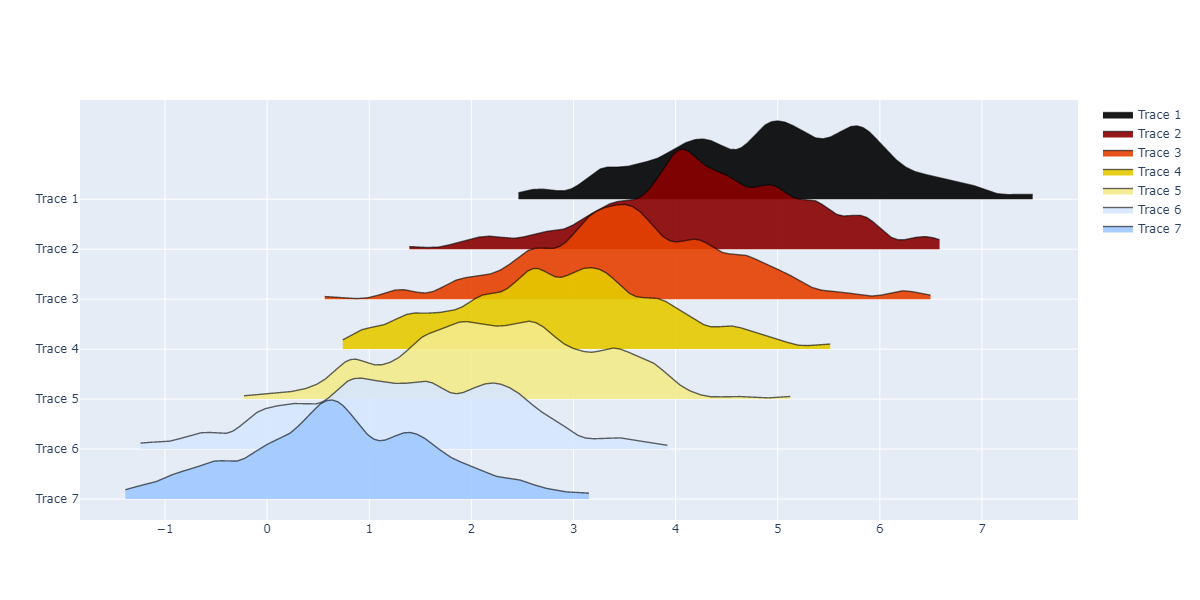

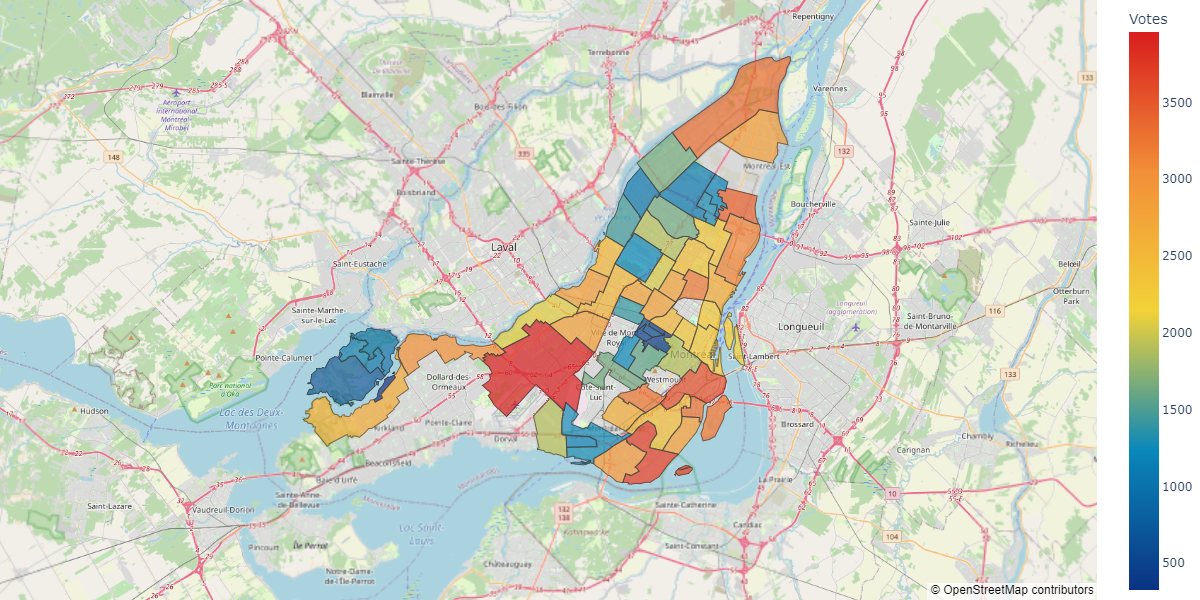

In [17]:
fig1.show(renderer='png', height=600, width=1200)
fig2.show(renderer='png', height=600, width=1200)
fig3.show(renderer='png', height=600, width=1200)

<h2 id="chapter9">9. Export as HTML or PDF</h2>

A notebook can be shared as a `.ipynb` file but only familiar audiences will be able to view and use it. For others, it is helpful to export as HTML or PDF.

### Save and Export Notebook As...

Jupyter allows you to export notebooks as various formats but export options are completely dependent on your `nbconvert` configuration so it will be helpful to review the [documentation](https://nbconvert.readthedocs.io/en/latest/) to learn more.

Selecting an export format via this interface invokes `nbconvert` but it is also usable as a command line tool.

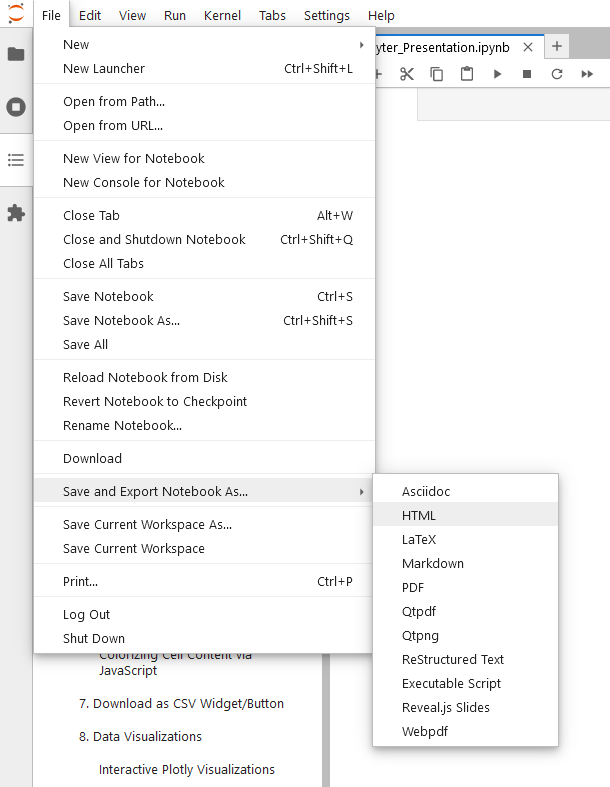

### HTML

The command line syntax to run the `nbconvert` script for HTML is:

```jupyter nbconvert --to HTML <name of notebook>.ipynb```

This will generate an HTML version of the notebook in the same location as the notebook.

### PDF (Web)

The simplest way to export a notebook as a PDF file would be to use `--to webpdf` which first renders to HTML and then exports as PDF. The webpdf exporter requires the `pyppeteer` library to function successfully so ensure that it is installed first.

```jupyter nbconvert --to webpdf <name of notebook>.ipynb```

This will generate a PDF version of the notebook that is entirely static so it will be absolutely necessary to plan the content of a notebook around this hindrance if a PDF export is needed

### Bulk Convert Notebooks

In situations where there are more than a few notebooks to convert, the tedious act of listing them out individually can be avoided by using the asterisk wildcard `*` in front of the `.ipynb` file extension. 

```jupyter nbconvert --to <format> *.ipynb```

This will bulk convert **ALL** notebooks in the current directory into whichever format is specified.

### Additional Options

There are additional flags that can be specified like `--template` and `--theme` to dictate the overall aesthetic of the export but there are also some specific ways to augment an export. 

+ Use `--no-input` to remove all code cells.
+ Use `--no-prompt` to remove all input and output prompts.
+ Use `--embed-images` to embed images as base64 data URLs.
+ Use `--execute` to execute a notebook prior to export.

To create a presentation-ready export from *within* a notebook.

```!jupyter nbconvert --execute --to <format> --no-prompt --no-input --embed-images <name of notebook>.ipynb```

Leading with an exclamation `!` is used to execute commands from the underlying operating system when working inside Jupyter.

<h2 id="chapter10">10. Pandas-Profiling</h2>

With `pandas-profiling`, an EDA (exploratory data analysis) report can be performed on any dataset and the results of that report can be added to Jupyter via iframe or as a widget. Read more about `pandas-profiling` by visiting their website [here](https://pandas-profiling.ydata.ai/docs/master/pages/getting_started/overview.html). 

In [18]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df4, title='Pandas-Profiling Example')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]